Project 2, Shouren Wang's Part

(This is only Shouren Wang's Part of Project 2, Joseph Eckstein's part was not included in this file)

(We have also uploaded a merged ipynb file that contains both of our works. This file is just to help the grader understand the part Shouren Wang did.)
# Data Processing
- Use Bag-Of-Words approach to convert the raw data into a matrix. Each row is a tweet, represented by a vector of word frequency.
- Output the matrix into a .txt file. 
- Provide summary statistics


In [23]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

## Prepare the data

In [24]:
# Set the file path
file_path = 'cnnhealth.txt'

# Read the file and extract the text 
with open(file_path, 'r', encoding='utf-8') as file:
    tweets = []
    for line in file:
        parts = line.strip().split('|')
        tweet_text = parts[2]
        tweets.append(tweet_text)

## Generate the BoW matrix
Using CountVectorizer method in sci-kit learn to generate the BoW matrix.
Output the result as a matrix to a .txt file

In [28]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(tweets)
bow_matrix = X.toarray()
np.savetxt('bow_matrix.txt', bow_matrix, fmt='%d')

## Calculate the statistics as the required format

In [5]:
# Calculate the statistics
num_documents = X.shape[0]
num_terms_tokens = X.sum()
num_unique_terms = X.shape[1]
avg_term_per_doc = num_terms_tokens / num_documents

# Save the statistics to a file
summary_df = pd.DataFrame({
    'Documents': [num_documents],
    'Terms (Tokens)': [num_terms_tokens],
    'Unique Terms': [num_unique_terms],
    'Avg. Terms per Document': [avg_term_per_doc]
})

# Save to .txt file
# summary_df.to_csv('summary.txt', sep='|', index=False)
summary_df.to_string('summary.txt', index=False)

# Define the distance.
Here, we apply the following two distance for the clustering algorithms
- Euclidean Distance
- Cosine Similarity

Euclidean Distance is the most common distance which can serve as the baseline.
Cosine Similarity is suitable for the sparse data.

## Define and calculate the distance

In [8]:
# Import the dependencies
from sklearn.metrics import pairwise_distances

# Calcualte the euclidean distance
euclidean_distances = pairwise_distances(X, metric='euclidean')

# Calculate the cosine similarity
cosine_distances = pairwise_distances(X, metric='cosine')
cosine_similarity = 1 - cosine_distances

# Save the distance matrices to files
np.savetxt('euclidean_distances.txt', euclidean_distances, fmt='%.4f')
np.savetxt('cosine_similarity.txt', cosine_similarity, fmt='%.4f')

## Visualize the distance
Visualize the distance via histograms 
### Histograms for Euclidean Distance

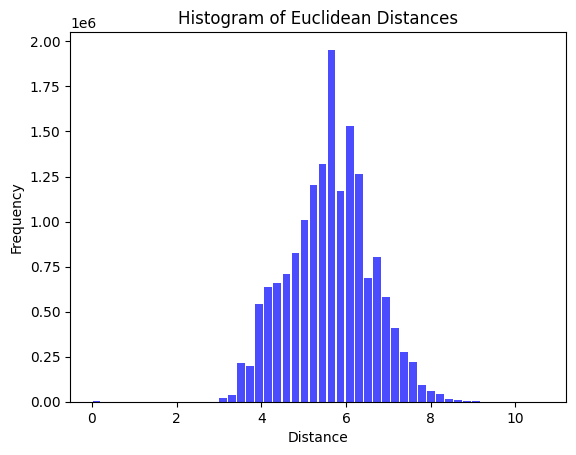

In [9]:
plt.hist(euclidean_distances.flatten(), bins=50, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Euclidean Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Histograms for Cosine Distance

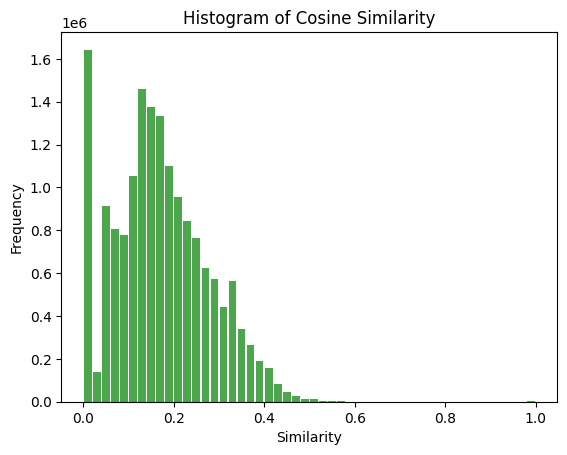

In [10]:
plt.hist(cosine_similarity.flatten(), bins=50, color='green', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Cosine Similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

## Reason for selecting the 2 distances
### Euclidean Distance
Euclidean Distance is a fundamental distance measure. Though BoW features are high-dimensional and sparse, Euclidean distance can still serve as a baseline that allows us to understand the absolute differences.
### Cosine Similarty
Cosine Distance is more suitable for text processing, especially the data is high-dimensional and sparse like the data matrix we get from BoW. Cosine Similarty focuses more on the direction of vectors than the magnitude, which makes it less senstive to the text length. 


# Clustering
## K-Means
### Selction of 'k' value

c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

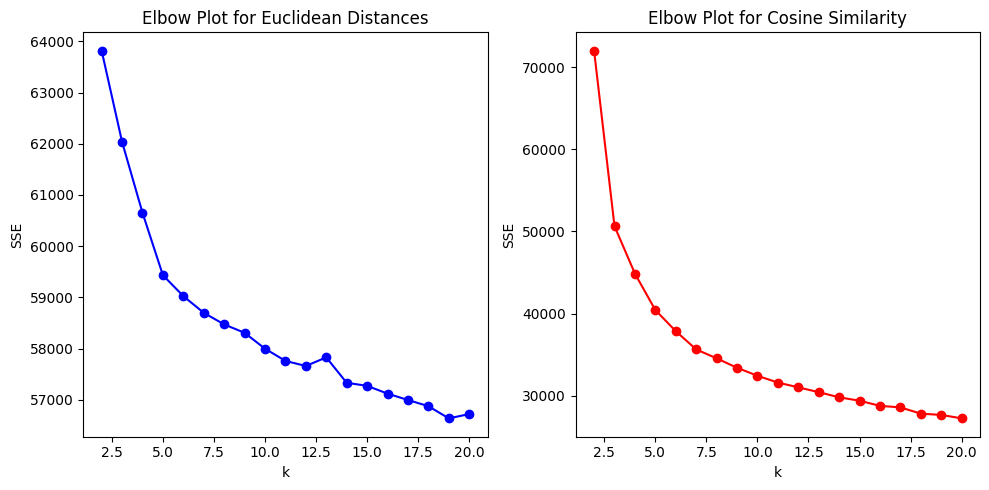

In [11]:
# import the dependencies
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(2, 21)
sse_euclidean = []
sse_cosine = []

for k in k_values:
    kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
    kmeans_euclidean.fit(X)
    sse_euclidean.append(kmeans_euclidean.inertia_)

    kmeans_cosine = KMeans(n_clusters=k, random_state=42)
    kmeans_cosine.fit(cosine_similarity)
    sse_cosine.append(kmeans_cosine.inertia_)

# Plot the elbow plot for both euclidean and cosine distances
plt.figure(figsize=(10, 5))

# Plot the elbow plot for euclidean distances
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_euclidean, 'bo-')
plt.title('Elbow Plot for Euclidean Distances')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot the elbow plot for cosine similarity
plt.subplot(1, 2, 2)
plt.plot(k_values, sse_cosine, 'ro-')
plt.title('Elbow Plot for Cosine Similarity')
plt.xlabel('k')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

According to the plot, the 'elbow' is at k=6. For the following analysis, we choose k=6.

### Evaluation
Evaluate the K-Means model using separation (e.g., BSS) and Silhouette score

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Select k = 6 for both euclidean and cosine similarity
k_euclidean = 6
k_cosine = 6

# Clustering the data using KMeans for both euclidean and cosine similarity
kmeans_euclidean = KMeans(n_clusters=k_euclidean, random_state=42)
kmeans_euclidean.fit(X)

kmeans_cosine = KMeans(n_clusters=k_cosine, random_state=42)
kmeans_cosine.fit(X)

# Calculate the silhouette score for euclidean distances
silhouette_score_euclidean = silhouette_score(X, kmeans_euclidean.labels_, metric='euclidean')

# Calculate the silhouette score for cosine similarity
silhouette_score_cosine = silhouette_score(X, kmeans_cosine.labels_, metric='cosine')

# Calculate the BSS for both euclidean and cosine similarity
# Calculate TSS
X_centered = X - X.mean(axis=0)
tss = np.square(X_centered).sum()

# Calculate BSS for euclidean distances
bss_euclidean = tss - kmeans_euclidean.inertia_

# Calculate BSS for cosine similarity
bss_cosine = tss - kmeans_cosine.inertia_

# Print the results
print('Silhouette Score (Euclidean):', silhouette_score_euclidean)
print('Silhouette Score (Cosine):', silhouette_score_cosine)
print('BSS (Euclidean):', bss_euclidean)
print('BSS (Cosine):', bss_cosine)



c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (Euclidean): 0.00026008777877936363
Silhouette Score (Cosine): 0.05095794017959112
BSS (Euclidean): 7061.866961774351
BSS (Cosine): 7061.866961774351


### Result Analysis

In [8]:
import pandas as pd

# Calculate the distribution for each cluster for both euclidean and cosine similarity
cluster_sizes_euclidean = pd.Series(kmeans_euclidean.labels_).value_counts().sort_index()
cluster_sizes_cosine = pd.Series(kmeans_cosine.labels_).value_counts().sort_index()

# Print the results
print("Cluster Sizes (Euclidean):\n", cluster_sizes_euclidean)
print("Cluster Sizes (Cosine):\n", cluster_sizes_cosine)

Cluster Sizes (Euclidean):
 0     365
1     667
2     423
3    1373
4     309
5     924
Name: count, dtype: int64
Cluster Sizes (Cosine):
 0     365
1     667
2     423
3    1373
4     309
5     924
Name: count, dtype: int64


### Visualization
Here we draw the heatmap for visualization

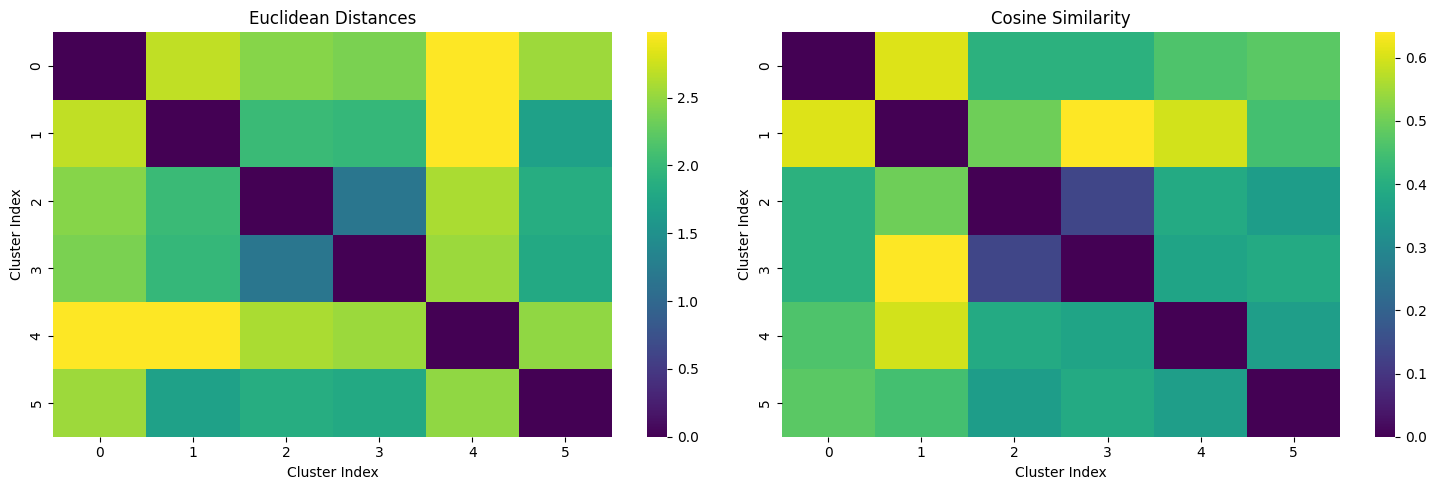

In [ ]:
import seaborn as sns
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Draw the heatmaps between each cluster for both euclidean and cosine similarity

# Calculate each cluster's centroid
cluster_centroids_euclidean = kmeans_euclidean.cluster_centers_
cluster_centroids_cosine = kmeans_cosine.cluster_centers_

# Calculate the distance matrix for euclidean distances
distance_matrix_euclidean = pairwise_distances(cluster_centroids_euclidean, metric='euclidean')

# Calculate the distance matrix for cosine similarity
cosine_distances = pairwise_distances(cluster_centroids_cosine, metric='cosine')

# Plot the heatmaps
plt.figure(figsize=(15, 5))

# Plot the heatmap for euclidean distances
plt.subplot(1, 2, 1)
sns.heatmap(distance_matrix_euclidean, cmap='viridis')
plt.title('Euclidean Distances')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Index')

# Plot the heatmap for cosine similarity
plt.subplot(1, 2, 2)
sns.heatmap(cosine_distances, cmap='viridis')
plt.title('Cosine Similarity')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Index')

plt.tight_layout()
plt.show()



## Hierarchical Clustering
### Selction of cluster numbers

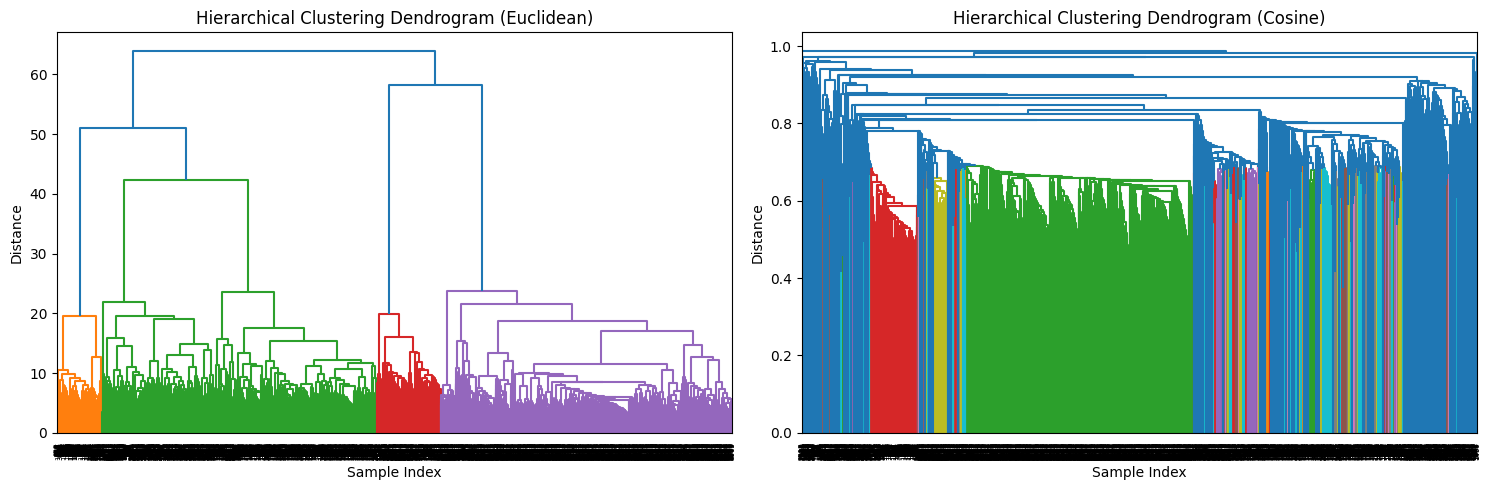

In [20]:
# Import the dependencies
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Convert the sparse BoW matrix to a dense matrix
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Calculate the linkage matrix for euclidean distances
linkage_matrix_euclidean = linkage(X_dense, method='ward', metric='euclidean')

# Calculate the linkage matrix for cosine similarity
linkage_matrix_cosine = linkage(X_dense, method='average', metric='cosine')

# Plot the dendrograms
plt.figure(figsize=(15, 5))
# Plot the dendrogram for euclidean distances
plt.subplot(1, 2, 1)
dendrogram(linkage_matrix_euclidean)
plt.title('Hierarchical Clustering Dendrogram (Euclidean)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Plot the dendrogram for cosine similarity
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix_cosine)
plt.title('Hierarchical Clustering Dendrogram (Cosine)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

According to the plot, we choose 6 as the number of the clusters.

### Evaluation
Evaluate  Hierarchical Clustering using separation (e.g., BSS) and Silhouette score

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import numpy as np

# According to the dendrogram plot, choose k=6 for both Euclidean distance and Cosine similarity
k_euclidean = 6
k_cosine = 6

# Convert the sparse BoW matrix to a dense matrix
X = X.toarray() if hasattr(X, 'toarray') else X

# Clustering the data using Agglomerative Clustering for both Euclidean distance and Cosine similarity
agg_euclidean = AgglomerativeClustering(n_clusters=k_euclidean, affinity='euclidean', linkage='ward')
labels_euclidean = agg_euclidean.fit_predict(X)

agg_cosine = AgglomerativeClustering(n_clusters=k_cosine, affinity='cosine', linkage='average')
# Firstly calculate the cosine similarity matrix
cosine_distances_matrix = pairwise_distances(X, metric='cosine')
labels_cosine = agg_cosine.fit_predict(cosine_distances_matrix)

# Calculate the silhouette score for euclidean distances
silhouette_score_euclidean = silhouette_score(X, labels_euclidean, metric='euclidean')

# Calculate the silhouette score for cosine similarity
silhouette_score_cosine = silhouette_score(X, labels_cosine, metric='cosine')

# Calculate the BSS for both euclidean and cosine similarity
# Calculate TSS
X_centered = X - X.mean(axis=0)
tss = np.square(X_centered).sum()

# Calculate WSS for euclidean distances
wss_euclidean = np.sum([np.sum(np.square(X[labels_euclidean == i] - np.mean(X[labels_euclidean == i], axis=0))) for i in range(k_euclidean)])

# Calculate WSS for cosine similarity
wss_cosine = np.sum([np.sum(np.square(X[labels_cosine == i] - np.mean(X[labels_cosine == i], axis=0))) for i in range(k_cosine)])

# Calculate BSS for euclidean distances
bss_euclidean = tss - wss_euclidean

# Calculate BSS for cosine similarity
bss_cosine = tss - wss_cosine


# Print the results
print('Silhouette Score (Euclidean):', silhouette_score_euclidean)
print('Silhouette Score (Cosine):', silhouette_score_cosine)
print('BSS (Euclidean):', bss_euclidean)
print('BSS (Cosine):', bss_cosine)

c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\wang1\anaconda3\envs\csds435\lib\site-packages\sklearn\cluster\_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Silhouette Score (Euclidean): 0.02336988737257669
Silhouette Score (Cosine): 0.019735745139246242
BSS (Euclidean): 6213.7096038183445
BSS (Cosine): 5238.339572149205


### Result Analysis

In [11]:
import pandas as pd

# Calculate the distribution for each cluster for both euclidean and cosine similarity
cluster_sizes_euclidean = pd.Series(labels_euclidean).value_counts().sort_index()
cluster_sizes_cosine = pd.Series(labels_cosine).value_counts().sort_index()

# Print the results
print("Cluster Sizes (Euclidean):\n", cluster_sizes_euclidean)
print("Cluster Sizes (Cosine):\n", cluster_sizes_cosine)


Cluster Sizes (Euclidean):
 0     976
1     676
2     383
3     273
4    1665
5      88
Name: count, dtype: int64
Cluster Sizes (Cosine):
 0    1551
1    1587
2     276
3       2
4     618
5      27
Name: count, dtype: int64


### Visualization
Here we draw the heatmap for visualization

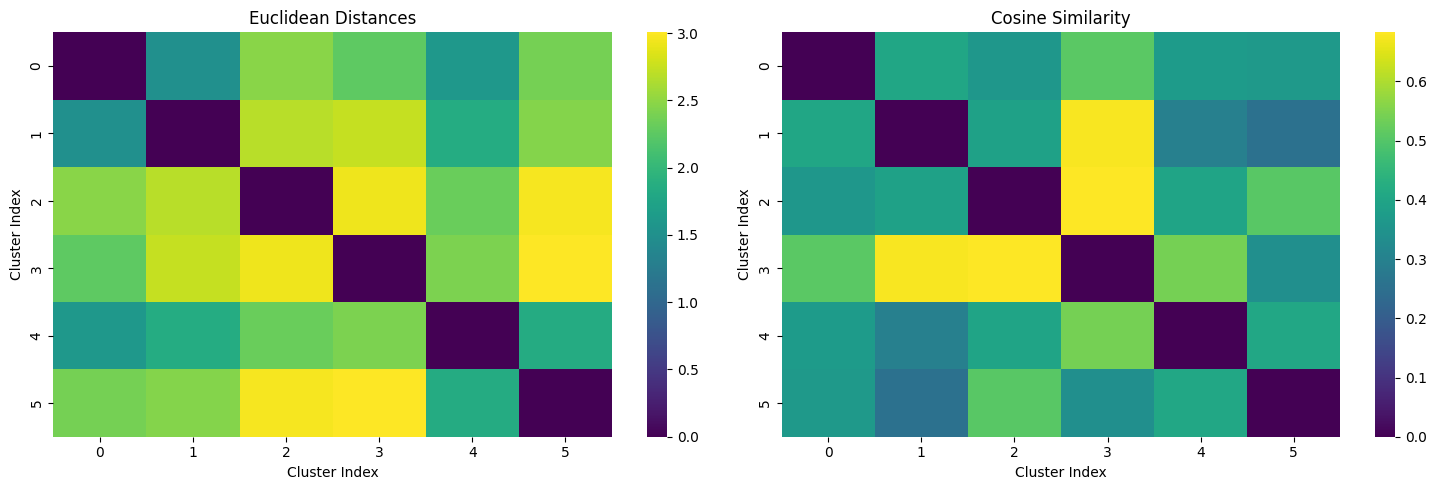

In [ ]:
import seaborn as sns


# Draw the heatmaps between each cluster for both euclidean and cosine similarity

# Calculate each cluster's centroid
cluster_centroids_euclidean = np.array([X[labels_euclidean == i].mean(axis=0) for i in range(k_euclidean)])
cluster_centroids_cosine = np.array([X[labels_cosine == i].mean(axis=0) for i in range(k_cosine)])

# Calculate the distance matrix for euclidean distances
distance_matrix_euclidean = pairwise_distances(cluster_centroids_euclidean, metric='euclidean')

# Calculate the distance matrix for cosine similarity
cosine_distances = pairwise_distances(cluster_centroids_cosine, metric='cosine')

# Plot the heatmaps
plt.figure(figsize=(15, 5))

# Plot the heatmap for euclidean distances
plt.subplot(1, 2, 1)
sns.heatmap(distance_matrix_euclidean, cmap='viridis')
plt.title('Euclidean Distances')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Index')

# Plot the heatmap for cosine similarity
plt.subplot(1, 2, 2)
sns.heatmap(cosine_distances, cmap='viridis')
plt.title('Cosine Similarity')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Index')

plt.tight_layout()
plt.show()




# Purity and Entropy 
Here we calculate Agglomerative Clustering's purity and entropy with respect to the clustering result generated by K-means to show their consistency.

## Calculate the Purity and Entropy

In [16]:
from sklearn.metrics import confusion_matrix
from scipy.stats import entropy

# Define the function to calculate the purity
def calculate_purity(y_true, y_pred):
    # Initialize the purity
    purity = 0

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate the purity
    majority_sum = np.sum(np.amax(cm, axis=0))


    return majority_sum / np.sum(cm)

# Define the funciton to calculate the entropy
def calculate_entropy(y_true, y_pred):

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate the entropy for each cluster
    cluster_entropy = []
    for cluster in cm.T:
        cluster_probability = cluster / np.sum(cluster)
        cluster_entropy.append(entropy(cluster_probability))
    
    # Calculate the total entropy
    total_entropy = np.sum(cluster_entropy) / len(cluster_entropy)
    
    return total_entropy


# Use the result of K-Means as the ground truth and calculate the purity and entropy for both euclidean and cosine similarity
purity_euclidean = calculate_purity(kmeans_euclidean.labels_, labels_euclidean)
entropy_euclidean = calculate_entropy(kmeans_euclidean.labels_, labels_euclidean)

purity_cosine = calculate_purity(kmeans_cosine.labels_, labels_cosine)
entropy_cosine = calculate_entropy(kmeans_cosine.labels_, labels_cosine)

# Print the results
print('Purity (Euclidean):', purity_euclidean)
print('Entropy (Euclidean):', entropy_euclidean)
print('Purity (Cosine):', purity_cosine)
print('Entropy (Cosine):', entropy_cosine)


Purity (Euclidean): 0.8268899285890174
Entropy (Euclidean): 0.5417568531993942
Purity (Cosine): 0.6956414676188131
Entropy (Cosine): 0.44762860275641825


## Result Analysis
The results indicate that Agglomerative Clustering and K-means show higher consistency when using Euclidean distance, with a Purity of 0.8269 and moderate Entropy of 0.5418, suggesting overall similar cluster assignments. However, using Cosine distance, the consistency drops, with a lower Purity of 0.6956, though the Entropy (0.4476) is slightly lower, indicating somewhat clearer cluster boundaries. Overall, Euclidean distance leads to better agreement between the two clustering methods, while Cosine distance produces more divergence in cluster assignments.